In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from time import time

In [2]:
#讀取資料
train_data = pd.read_csv('train2014-15.csv', index_col=0)
test_data  = pd.read_csv('test2016.csv', index_col=0)

In [3]:
test_data.head()

,Day,Date,Temperature,DayBef_1,DayBef_2,DayBef_3,DayBef_4,DayBef_5,DayBef_6,DayBef_7,DayBef_8,DayBef_9,DayBef_10,DayBef_11,DayBef_12,DayBef_13,DayBef_14,DayBef_15
1,1,2016/1/1,19.8,16.5,16.0,17.7,16.0,16.7,17.5,16.5,20.8,21.9,22.8,20.7,21.6,18.9,15.6,11.4
2,2,2016/1/2,18.6,19.8,16.5,16.0,17.7,16.0,16.7,17.5,16.5,20.8,21.9,22.8,20.7,21.6,18.9,15.6
3,3,2016/1/3,19.5,18.6,19.8,16.5,16.0,17.7,16.0,16.7,17.5,16.5,20.8,21.9,22.8,20.7,21.6,18.9
4,4,2016/1/4,21.8,19.5,18.6,19.8,16.5,16.0,17.7,16.0,16.7,17.5,16.5,20.8,21.9,22.8,20.7,21.6
5,5,2016/1/5,21.8,21.8,19.5,18.6,19.8,16.5,16.0,17.7,16.0,16.7,17.5,16.5,20.8,21.9,22.8,20.7


In [4]:
train_data.head()

,Day,Date,Temperature,DayBef_1,DayBef_2,DayBef_3,DayBef_4,DayBef_5,DayBef_6,DayBef_7,DayBef_8,DayBef_9,DayBef_10,DayBef_11,DayBef_12,DayBef_13,DayBef_14,DayBef_15
1,1,2014/1/1,17.6,16.1,14.3,11.2,12.2,10.7,13.7,15.5,14.2,14.7,14.3,12.2,13.2,12.3,13.5,16.0
2,2,2014/1/2,19.3,17.6,16.1,14.3,11.2,12.2,10.7,13.7,15.5,14.2,14.7,14.3,12.2,13.2,12.3,13.5
3,3,2014/1/3,18.6,19.3,17.6,16.1,14.3,11.2,12.2,10.7,13.7,15.5,14.2,14.7,14.3,12.2,13.2,12.3
4,4,2014/1/4,16.6,18.6,19.3,17.6,16.1,14.3,11.2,12.2,10.7,13.7,15.5,14.2,14.7,14.3,12.2,13.2
5,5,2014/1/5,15.4,16.6,18.6,19.3,17.6,16.1,14.3,11.2,12.2,10.7,13.7,15.5,14.2,14.7,14.3,12.2


In [5]:
#設定欄位
feature_cols = ['DayBef_1','DayBef_2','DayBef_3','DayBef_4','DayBef_5',
                'DayBef_6','DayBef_7','DayBef_8','DayBef_9','DayBef_10',
                'DayBef_11','DayBef_12','DayBef_13','DayBef_14','DayBef_15']
Train_Target = train_data['Temperature']
Train_Column = train_data[feature_cols]

In [6]:
#訓練模型
lm = LinearRegression()

t0 = time()
lm.fit(Train_Column,Train_Target)
tt = time() - t0

print("Model trained in {} seconds".format(round(tt,3)))

Model trained in 0.162 seconds


In [7]:
#預測並求出預測數據與實際數據之間的誤差
preds = lm.predict(test_data[feature_cols])
mean_squared_error(preds,test_data['Temperature'])

2.9982761399697835

In [8]:
#製圖前準備
Predict_Series = pd.Series(preds)
Predict_Series.index = Predict_Series.index+1
Predict_Series.name  ="Pred_Temp"

result = pd.concat([test_data.Day,test_data.Date,test_data.Temperature,Predict_Series], axis=1)
result.head(5)

,Day,Date,Temperature,Pred_Temp
1,1,2016/1/1,19.8,17.109523
2,2,2016/1/2,18.6,20.149946
3,3,2016/1/3,19.5,18.124203
4,4,2016/1/4,21.8,19.918945
5,5,2016/1/5,21.8,21.498533


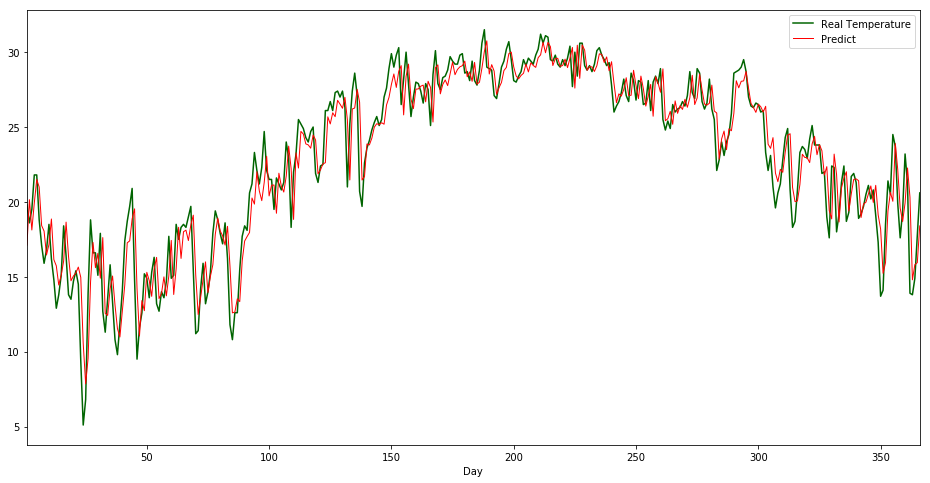

In [9]:
#製圖
plt.close()
ax=test_data.plot(x='Day', y='Temperature',color='DarkGreen', label='Real Temperature',figsize=(16, 8));
result.plot(x='Day', y='Pred_Temp', color='R', lw=1, label='Predict', ax=ax)
plt.show()